In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

def plot_run_small(ax, filename, focus_on_small=False):
    runID = filename[0:-4]
    print(runID)
    # load data
    d = pd.read_csv(runID + '.csv', sep=';')
    # line plot for set of used methods
    for method in [' matmul()', ' nested loops', ' numpy']:
        ax.plot(d[d[' method'] == method]['n_elements'], 
                d[d[' method'] == method]['time'], 
                marker='o',label=method)
    # zoom on small problem sizes
    if (focus_on_small):
        ax.set_xlim(0,1000000); ax.set_ylim(0,3)
    #label stuff
    ax.set_xlabel("$N_{elements}$")
    ax.set_ylabel("$time$ [s]")
    ax.set_title(runID)
    #ax.legend()
    
def plot_run(ax, filename, focus_on_small=False, legend=True):
    runID = filename[0:-4]
    print(runID)
    # load data
    d = pd.read_csv(runID + '.csv', sep=';')
    # line plot for set of used methods
    for method in [' matmul()', ' nested loops', ' numpy']:
        ax.plot(d[d[' method'] == method]['n_elements'], 
                d[d[' method'] == method]['time'], 
                marker='o',label=method)
    # zoom on small problem sizes
    if (focus_on_small):
        ax.set_xlim(0,1000000); ax.set_ylim(0,3)
    #label stuff
    ax.set_xlabel("$N_{elements}$")
    ax.set_ylabel("$time$ [s]")
    ax.set_title(runID)
    if legend: ax.legend()
    
def plot_dual(f1,f2, limits=False):
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,4))
    plot_run(axs[0], f1)
    plot_run(axs[1], f2)
    if (limits):
        for ax in axs:
            ax.set_xlim(*limits[0]); ax.set_ylim(*limits[1])
    
def get_csv_list():
    csvs = [name for name in os.listdir() if name.endswith('.csv')]
    csvs.sort()
    return csvs

In [4]:
! ls -al *.csv; ls -al *.csv | wc -l

-rw-r--r-- 1 m300872 mpiscl 1662 Nov 22 14:34 gcc__O2_ETIME_SYSTEM.csv
-rw-r--r-- 1 m300872 mpiscl 1662 Nov 22 14:34 gcc__O2_ICON_WALLCLOCK_TIMER.csv
-rw-r--r-- 1 m300872 mpiscl 1662 Nov 22 14:34 gcc__O2_TIMER_CPU_TIME.csv
-rw-r--r-- 1 m300872 mpiscl 1662 Nov 22 14:34 gcc__O3_ETIME_ELAPSED.csv
-rw-r--r-- 1 m300872 mpiscl 1662 Nov 22 14:34 gcc__O3_ETIME_SYSTEM.csv
-rw-r--r-- 1 m300872 mpiscl 1662 Nov 22 14:34 gcc__O3_ICON_WALLCLOCK_TIMER.csv
-rw-r--r-- 1 m300872 mpiscl 1662 Nov 22 14:34 gcc__O3_OMP_WTIME.csv
-rw-r--r-- 1 m300872 mpiscl 1662 Nov 22 14:34 gcc__O3_TIMER_CPU_TIME.csv
-rw-r--r-- 1 m300872 mpiscl 1654 Nov 22 14:34 gfortran_O3_ICON_WALLCLOCK_TIMER.csv
-rw-r--r-- 1 m300872 mpiscl  640 Nov 22 14:34 gfortran_O3_OMP_WTIME.csv
-rw-r--r-- 1 m300872 mpiscl  130 Nov 22 14:34 gfortran_O3_TIMER_CPU_TIME.csv
-rw-r--r-- 1 m300872 mpiscl 1590 Nov 22 14:34 ifort_O3_ICON_WALLCLOCK_TIMER.csv
-rw-r--r-- 1 m300872 mpiscl  616 Nov 22 14:34 ifort_O3_OMP_WTIME.csv
-rw-r--r-- 1 m300872 mpiscl   24 

gcc__O3_ICON_WALLCLOCK_TIMER
gcc__O3_TIMER_CPU_TIME


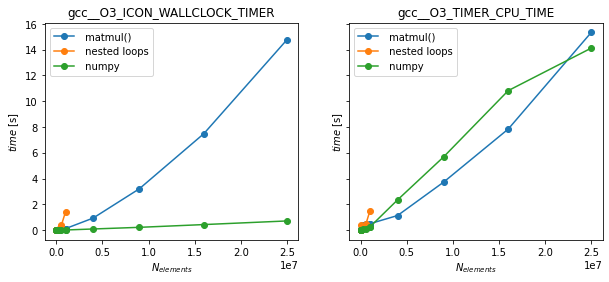

In [2]:
#runIDs = ['gcc__O3_TIMER_CPU_TIME', 'gcc__O3_ICON_WALLCLOCK_TIMER', 'gcc__O3_OMP_WTIME']
runIDs = ['gcc__O3_TIMER_CPU_TIME.csv', 'gcc__O3_ICON_WALLCLOCK_TIMER.csv', 'gcc__O3_OMP_WTIME.csv']
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,4))
plot_run(axs[0], runIDs[1])
plot_run(axs[1], runIDs[0])

gcc__O3_ICON_WALLCLOCK_TIMER
gcc__O3_OMP_WTIME


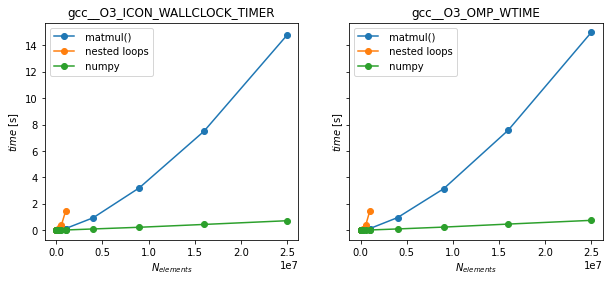

In [109]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,4))
plot_run(axs[0], runIDs[1])
plot_run(axs[1], runIDs[2])

gcc__O3_ETIME_ELAPSED
gcc__O3_ETIME_SYSTEM


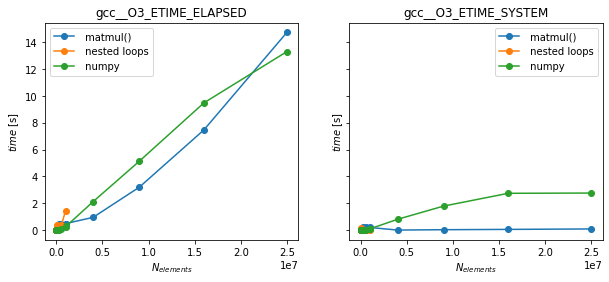

In [124]:
plot_dual('gcc__O3_ETIME_ELAPSED.csv', 'gcc__O3_ETIME_SYSTEM.csv')

gcc__O2_ICON_WALLCLOCK_TIMER
gcc__O3_ICON_WALLCLOCK_TIMER


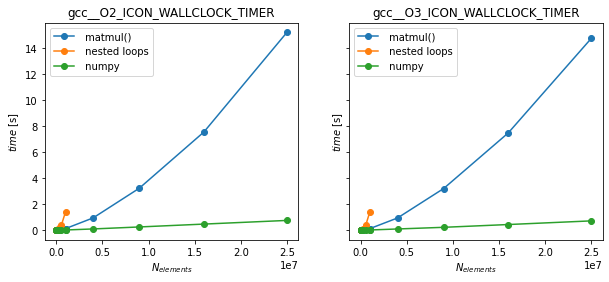

In [125]:
plot_dual('gcc__O2_ICON_WALLCLOCK_TIMER.csv', 'gcc__O3_ICON_WALLCLOCK_TIMER.csv')

gcc__O3_TIMER_CPU_TIME
gcc__O3_TIMER_CPU_TIME


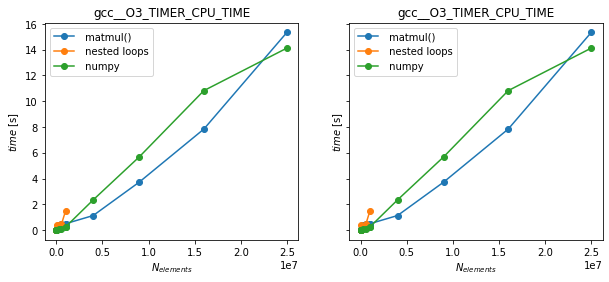

In [126]:
plot_dual('gcc__O3_TIMER_CPU_TIME.csv', 'gcc__O3_TIMER_CPU_TIME.csv')

In [5]:
! ls -al ../log/*.csv; ls -al ../log/*.csv | wc -l

-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 18:23 ../log/gfortran_O2_ETIME_ELAPSED.csv
-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 20:36 ../log/gfortran_O2_ETIME_SYSTEM.csv
-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 19:07 ../log/gfortran_O2_ETIME_USER.csv
-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 22:04 ../log/gfortran_O2_ICON_WALLCLOCK_TIMER.csv
-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 16:54 ../log/gfortran_O2_OMP_WTIME.csv
-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 23:33 ../log/gfortran_O2_TIMER_CPU_TIME.csv
-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 21:20 ../log/gfortran_O3_ETIME_SYSTEM.csv
-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 19:52 ../log/gfortran_O3_ETIME_USER.csv
-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 22:49 ../log/gfortran_O3_ICON_WALLCLOCK_TIMER.csv
-rw-r--r-- 1 m300872 mpiscl 2655 Nov 22 17:39 ../log/gfortran_O3_OMP_WTIME.csv
-rw-r--r-- 1 m300872 mpiscl 2556 Nov 23 00:08 ../log/gfortran_O3_TIMER_CPU_TIME.csv
-rw-r--r-- 1 m300872 mpiscl 2551 Nov 22 19:00 ../log/ifort_O2_ICON_WALLCLOCK_TIMER.csv


../log/gfortran_O3_ETIME_USER
../log/gfortran_O2_ETIME_USER


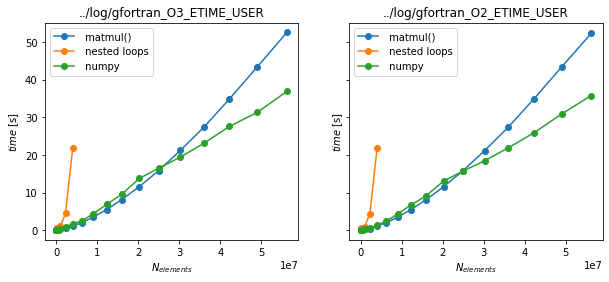

In [28]:

dat1 = '../log/gfortran_O3_ETIME_USER.csv'
dat2 = '../log/gfortran_O2_ETIME_USER.csv'
plot_dual(dat1, dat2)

../log/gfortran_O2_OMP_WTIME
../log/gfortran_O3_OMP_WTIME


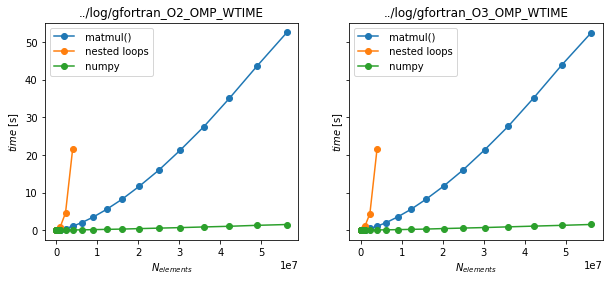

In [14]:
dat1 = '../log/gfortran_O2_OMP_WTIME.csv'
dat2 = '../log/gfortran_O3_OMP_WTIME.csv'
plot_dual(dat1, dat2)

../log/ifort_O2_ICON_WALLCLOCK_TIMER
../log/gfortran_O2_ICON_WALLCLOCK_TIMER


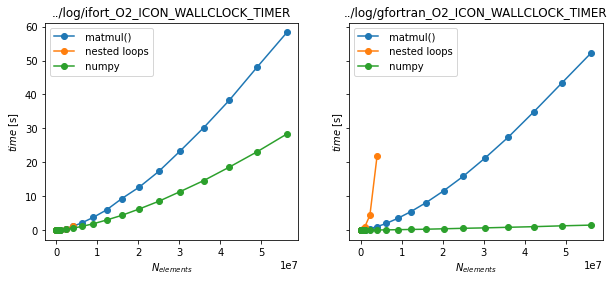

In [22]:
dat1 = '../log/ifort_O2_ICON_WALLCLOCK_TIMER.csv'
dat2 = '../log/gfortran_O2_ICON_WALLCLOCK_TIMER.csv'
plot_dual(dat1, dat2) #, limits=[(0,1e7),(0,25)])

../log/ifort_O2_ICON_WALLCLOCK_TIMER
../log/gfortran_O2_ICON_WALLCLOCK_TIMER


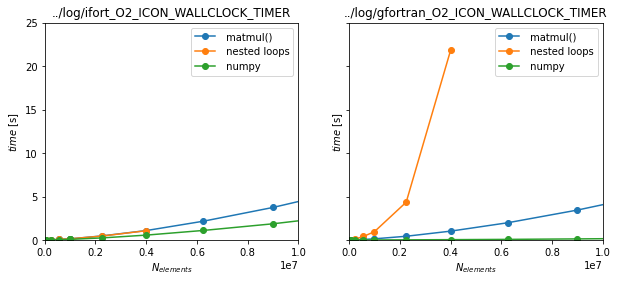

In [21]:
dat1 = '../log/ifort_O2_ICON_WALLCLOCK_TIMER.csv'
dat2 = '../log/gfortran_O2_ICON_WALLCLOCK_TIMER.csv'
plot_dual(dat1, dat2, limits=[(0,1e7),(0,25)])

../log/gfortran_O2_TIMER_CPU_TIME
../log/gfortran_O2_ICON_WALLCLOCK_TIMER


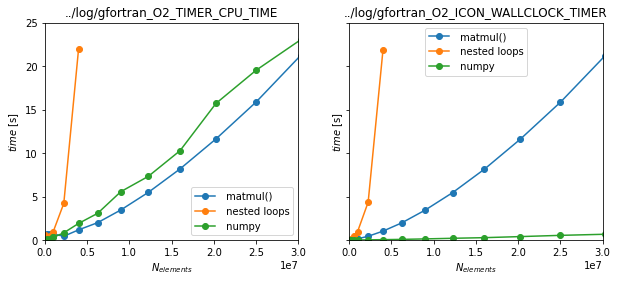

In [34]:
dat1 = '../log/gfortran_O2_TIMER_CPU_TIME.csv'
dat2 = '../log/gfortran_O2_ICON_WALLCLOCK_TIMER.csv'
plot_dual(dat1, dat2, limits=[(0,3e7),(0,25)])

ifort_O2_TIMER_CPU_TIME
ifort_O2_OMP_WTIME
ifort_O2_ICON_WALLCLOCK_TIMER
ifort_O3_OMP_WTIME
ifort_O3_ICON_WALLCLOCK_TIMER
gfortran_O3_TIMER_CPU_TIME
gfortran_O2_ETIME_SYSTEM
gfortran_O2_ETIME_ELAPSED
gfortran_O3_ICON_WALLCLOCK_TIMER
gfortran_O2_ETIME_USER
gfortran_O3_OMP_WTIME
gfortran_O3_ETIME_USER
gfortran_O2_TIMER_CPU_TIME
gfortran_O2_ICON_WALLCLOCK_TIMER
gfortran_O3_ETIME_SYSTEM
gfortran_O2_OMP_WTIME


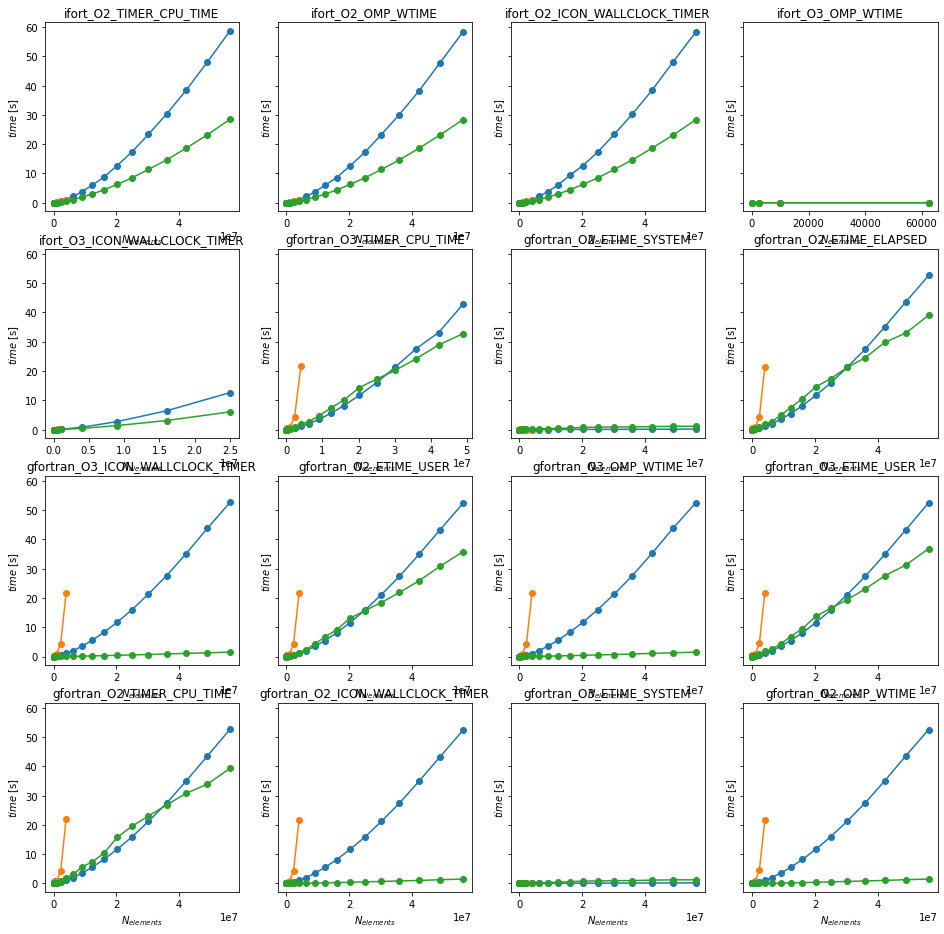

In [94]:
runs = glob.glob("ifort*.csv")
runs.extend(glob.glob("gfortran*.csv"))

figshape   = (4,4) # has to be adjusted manually. 
figscaling = 4

fig, axs = plt.subplots(*figshape, sharey=True, figsize=tuple([i*figscaling for i in figshape][::-1]))

for i in range(figshape[0]):
        for j in range(figshape[1]):
            plot_run_small(axs[i][j], runs[j + i*figshape[1]])
